### SKELETON OF JUPYTER NOTEBOOK WHICH CAN BE RUN WITH CROMWELL

### IMPORT NECESSARY MODULES

In [34]:
%matplotlib inline  
import matplotlib.pyplot as plt
import os
import json

### Read the file "parameters.json" from the execution directory

In [44]:
with open("parameters.json", 'rb') as f:
    params = json.load(f)
print(params)

{'wdl.alias': 'acbd', 'wdl.memo': 'this is the baseline run', 'wdl.file_train': 'gs://input_bucket_name/path_to_file/train_dataset.pkl', 'wdl.file_test': 'gs://input_bucket_name/path_to_file/test_dataset.pkl', 'wdl.file_ckpt': 'gs://input_bucket_name/path_to_file/ckp.pkl', 'wdl.bucket_output': 'gs://output_bucket_name', 'wdl.dir_output': 'output', 'wdl.notebook_name': 'main.ipynb', 'wdl.git_repo': 'https://github.com/dalessioluca/cromwell_for_ML.git', 'wdl.commit_or_branch': 'master', 'example_params_1': {'__comment': 'add here any parameters for your simulation', 'N_MAX_EPOCHS': 10, 'lr': 0.01, 'noise': 0.2}, 'example_params_2': {'__comment': 'more parameters if needed', 'n_feature': 1, 'n_hidden': 10, 'n_output': 1}}


### Create outout directory if it does not exist yet.prepare the file names

In [45]:
# CROMWELL + WDL  will localize: 
# gs://bucket_name/path_to_file/dataset.pkl -> execution_dir/dataset.pkl

train_file = os.path.basename(params["wdl.file_train"])
test_file = os.path.basename(params["wdl.file_test"])
ckpt_file = os.path.basename(params["wdl.file_ckpt"])
dir_output = params["wdl.dir_output"]

# create output directory if it does nto exists
try:
    os.mkdir(dir_output)
except FileExistsError:
    pass

# Save input_json_file to output dir
json_param_file = os.path.join(dir_output, "parameters.json")
with open(json_param_file, 'w') as f:
    json.dump(params, f)

print(train_file)
print(test_file)
print(dir_output)
print(json_param_file)

# checks inputs file are presents
#assert os.path.isfile(train_file)
#assert os.path.isfile(test_file)
#assert os.path.isfile(ckpt_file)

train_dataset.pkl
test_dataset.pkl
output
output/parameters.json


# Put here your code
Here is a dumm example of linear regression or example:

In [46]:
import torch

In [47]:
N_MAX_EPOCHS = params["example_params_1"]["N_MAX_EPOCHS"]
LR = params["example_params_1"]["lr"]
NOISE = params["example_params_1"]["noise"]
N_FEATURE = params["example_params_2"]["n_feature"]
N_HIDDEN = params["example_params_2"]["n_hidden"]
N_OUTPUT = params["example_params_2"]["n_output"]

### Make dataset
In the real situation you load the dataset from the train_file and test_file
Here we make a fake dataset 

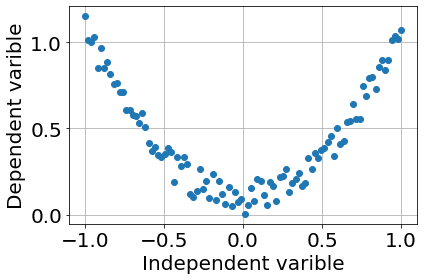

In [53]:
torch.manual_seed(1)    # reproducible
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1).requires_grad_(False)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + NOISE*torch.rand(x.size()).requires_grad_(False)               # noisy y data (tensor), shape=(100, 1)

# Plot of KL vs evidence
fontsize=20
labelsize=20

fig, ax = plt.subplots(1,1)
#plt.yscale('log')
#plt.xlim(xmin=1.0, xmax=1.5)
ax.set_xlabel('Independent varible',fontsize=fontsize)
ax.set_ylabel('Dependent varible',fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=labelsize)
ax.plot(x,y, 'o')
ax.grid()
fig.tight_layout()
tmp_file = os.path.join(dir_output, "input_data.png")
fig.savefig(tmp_file) 

### Define the model
In the real case you will import what you need from github repo

In [54]:
class MLP(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(MLP, self).__init__()
        self.predict = torch.nn.Sequential(
            torch.nn.Linear(n_feature, n_hidden),
            torch.nn.ReLU(),
            torch.nn.Linear(n_hidden, n_output) 
        )

    def forward(self, x):
        return self.predict(x)

net = MLP(n_feature=N_FEATURE, n_hidden=N_HIDDEN, n_output=N_OUTPUT)    
optimizer = torch.optim.SGD(net.parameters(), lr=LR)
criterion = torch.nn.MSELoss() 

### training loop

In [52]:
loss_history = []

for epoch in range(N_MAX_EPOCHS):
  
    prediction = net(x)     
    loss = criterion(prediction, y) 
    loss_history.append(loss.detach().item())
    
    # next 3 lines to do back_prop
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    print("epoch -> %3d, loss= %.3f" %(epoch,loss_history[-1]))

epoch ->   0, loss= 0.663
epoch ->   1, loss= 0.566
epoch ->   2, loss= 0.485
epoch ->   3, loss= 0.419
epoch ->   4, loss= 0.363
epoch ->   5, loss= 0.317
epoch ->   6, loss= 0.279
epoch ->   7, loss= 0.247
epoch ->   8, loss= 0.220
epoch ->   9, loss= 0.199


In [ ]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out
    
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [19]:
# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)


NEPOCHS = params["example_params_1"]["NEPOCHS"]
LR = params["example_params_1"]["NEPOCHS"]

pred = model(xb)
        loss = loss_func(pred, yb)
loss_history = []
for i in range(NEPOCHS):
    # train loop
    net = NET()
    
    

SyntaxError: unexpected EOF while parsing (<ipython-input-19-ebc3ff9cb30c>, line 9)

In [ ]:
train_dataset.check()

In [ ]:
test_dataset.check()

### Instantiate model and optimizer

In [ ]:
vae = VaeClass(params)
optimizer = instantiate_optimizer(vae, params)

### There are 3 possible simulation types: scratch, resumed, pretrained

In [ ]:
print("simulation type = "+str(params["simulation"]["type"]))

if (params["simulation"]["type"] == "scratch"):
    
    epoch_restart = -1
    history_dict = {}
    min_test_loss = 99999999

elif (params["simulation"]["type"] == "resumed"):
        
    resumed = load_info(path=params["simulation"]["path_to_file"], 
                        load_epoch=True, 
                        load_history=True)
    epoch_restart = resumed.epoch
    history_dict = resumed.history_dict
    min_test_loss = min(history_dict["test_loss"])
    
    load_model_optimizer(path=params["simulation"]["path_to_file"], 
                         model=vae,
                         optimizer=optimizer)

elif (params["simulation"]["type"] == "pretrained"):
       
    epoch_restart = -1
    history_dict = {}
    min_test_loss = 99999999
    
    load_model_optimizer(path=params["simulation"]["path_to_file"], 
                         model=vae,
                         optimizer=None)
    
# instantiate the scheduler if necessary    
if params["training"]["scheduler_is_active"]:
    scheduler = instantiate_scheduler(optimizer, params)

### Train loop

In [ ]:
TEST_FREQUENCY = params["training"]["TEST_FREQUENCY"]
CHECKPOINT_FREQUENCY = params["training"]["CHECKPOINT_FREQUENCY"]
NUM_EPOCHS = params["training"]["EPOCHS"]
BATCH_SIZE = params["training"]["batch_size"]

for delta_epoch in range(1,NUM_EPOCHS+1):
    epoch = delta_epoch+epoch_restart
    vae.train()   
    
    #with torch.autograd.set_detect_anomaly(True):
    with torch.autograd.set_detect_anomaly(False):
        train_metrics = train_one_epoch(vae, 
                                        train_dataset, 
                                        optimizer, 
                                        BATCH_SIZE, 
                                        verbose=(epoch==0), 
                                        weight_clipper=None)
        s = pretty_print_metrics(epoch, train_metrics, is_train=True)
        print(s)
            
        
        history_dict = add_named_tuple_to_dictionary(namedtuple=train_metrics, 
                                                     dictionary=history_dict,
                                                     key_prefix="train_")
        
    if params["training"]["scheduler_is_active"]:
        scheduler.step(epoch=epoch)
    
    if(epoch % TEST_FREQUENCY == 0):
        vae.eval()
        test_metrics = train_one_epoch(vae, 
                                       test_dataset, 
                                       optimizer, 
                                       BATCH_SIZE, 
                                       verbose=(epoch==0), 
                                       weight_clipper=None)
        
        s = pretty_print_metrics(epoch, test_metrics, is_train=False)
        print(s)
                
        history_dict = add_named_tuple_to_dictionary(namedtuple=test_metrics, 
                                                     dictionary=history_dict,
                                                     key_prefix="test_")
        
        test_loss = test_metrics["loss"]
        min_test_loss = min(min_test_loss, test_loss)
            
        #if((test_loss == min_test_loss) or ((epoch % CHECKPOINT_FREQUENCY) == 0)): 
        if((test_loss == min_test_loss) or ((epoch % TEST_FREQUENCY) == 0)):
            checkpoint_file = os.path.join(dir_output, "ckp_"+str(epoch)+".pkl")
            history_file = os.path.join(dir_output, "history_"+str(epoch)+".pkl")
            
            save_everything(model=vae, 
                            optimizer=optimizer, 
                            history_dict=history_dict, 
                            epoch=epoch, 
                            params_dict=params, 
                            path=checkpoint_file)
            
            save_dict_as_json(history_dict, path=history_file)
            print("saved files -> "+checkpoint_file+"  "+history_file)

# Check the results

In [ ]:
history_dict.keys()

In [ ]:
for k,v in history_dict.items():
    print(k," -->", history_dict[k][-3:])

In [ ]:
#plt.yscale('log')
y_shift=0
x_shift=0
sign=1

fontsize=10
fig, ax = plt.subplots(1,1)
ax.set_xlabel('REC',fontsize=fontsize)
ax.set_ylabel('REG',fontsize=fontsize)

ax.plot(np.arange(x_shift, x_shift+len(history_dict["train_loss"])), sign*np.array(history_dict["train_loss"])+y_shift,'-')
ax.plot(np.arange(x_shift, x_shift+len(history_dict["test_loss"])*TEST_FREQUENCY,TEST_FREQUENCY), sign*np.array(history_dict["test_loss"])+y_shift, '.--')
ax.set_xlabel('epoch')
ax.set_ylabel('LOSS = - ELBO')
ax.set_title('Training procedure')
ax.grid(True)
ax.legend(['train', 'test_clean', 'test_noisy'])

fig.tight_layout()
tmp_file = os.path.join(dir_output, "loss.png")
fig.savefig(tmp_file)

In [ ]:
# Plot of KL vs evidence
fontsize=20
labelsize=20

how_many = 2000
scale= 1
N = len(history_dict["train_kl"][-how_many :])
colors = np.arange(0.0,N,1.0)/N

fig, ax = plt.subplots(1,1)
#plt.yscale('log')
#plt.xlim(xmin=1.0, xmax=1.5)
ax.set_xlabel('REC',fontsize=fontsize)
ax.set_ylabel('REG',fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=labelsize)
ax.scatter(history_dict["train_nll"][-how_many :], history_dict["train_kl"][-how_many :],c=colors)
ax.plot(history_dict["train_nll"][-how_many :], history_dict["train_kl"][-how_many :], '-')
ax.grid()
#plt.xlim(xmax=2.5)

fig.tight_layout()
tmp_file = os.path.join(dir_output, "rec_kl_trajectory.png")
fig.savefig(tmp_file) 

### Check reconstruction

In [ ]:
tmp_list = [291, 413, 133, 148, 1,2,3,4,5,6,7,8,9]
reference_imgs, labels=test_dataset.load(batch_size=9, indices=tmp_list)
metric, inference = vae.reconstruct_img(reference_imgs)

reconstruction_file = os.path.join(dir_output, "imgs_reconstructed.png")
reference_file = os.path.join(dir_output, "imgs_reference.png")

imgs_ref = show_batch(reference_imgs[:],n_col=3,n_padding=4,title="REFERENCE")
imgs_ref.savefig(reference_file)

imgs_rec = show_batch(inference.reconstruction, n_col=3,n_padding=4, title="REC_IMG")
imgs_rec.savefig(reconstruction_file)

display(imgs_rec, imgs_ref)

# MAKE MOVIE

In [ ]:
epoch="xxx"
a = show_batch(inference.reconstruction[:9],n_col=3,n_padding=4,title="EPOCH = "+str(epoch))
display(a)

# actual loop

In [ ]:
rec_filenames = []

for epoch in range(0,300,TEST_FREQUENCY):
    if(epoch<10):
        label ="_000"+str(epoch)
    elif(epoch<100):
        label = "_00"+str(epoch)
    elif(epoch<1000):
        label = "_0"+str(epoch)
    elif(epoch<10000):
        label = "_"+str(epoch)
    else:
        raise Exception

    try:
        checkpoint_file = os.path.join(dir_output, "ckp_"+str(epoch)+".pkl")
        _ = load_model_optimizer(path=checkpoint_file, model=vae, optimizer=None)
        metric, inference = vae.reconstruct_img(reference_imgs)
        tmp_fig = show_batch(inference.reconstruction[:8],n_col=4,n_padding=4,title="EPOCH = "+str(epoch))
        tmp_rec_file = os.path.join(dir_output, "imgs_rec"+label+".png")
        rec_filenames.append(tmp_rec_file)
        tmp_fig.savefig(tmp_rec_file, bbox_inches='tight') 
    except:
        pass

print(rec_filenames)

## Check individual images

In [ ]:
def show_frame_rec(n):
    tmp = Image(filename=rec_filenames[n])
    return display(tmp)

def show_frame_all(n):
    c = Image(filename=rec_filenames[n])
    return display(c)

# make gif file

In [ ]:
movie_rec_file_local = "movie_rec.gif"
movie_rec_file_absolute = os.path.join(dir_output, movie_rec_file_local)

frame_per_second = 2
im = mpy.ImageSequenceClip(rec_filenames, fps=frame_per_second)
im.write_gif(movie_rec_file_local, fps=frame_per_second)
im.write_gif(movie_rec_file_absolute, fps=frame_per_second)

In [ ]:
HTML("<img src="+movie_rec_file_local+"></img>")

In [ ]:
show_frame_rec(0)

In [ ]:
show_batch(reference_imgs[:8],n_col=4,n_padding=4,title="REFERENCE")